In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
194,195,Female,47,120,16
83,84,Female,46,54,44
3,4,Female,23,16,77
37,38,Female,30,34,73
97,98,Female,27,60,50


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.shape

(200, 5)

In [7]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.Genre.value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

C:\Users\DPC\AppData\Local\Temp\ipykernel_3908\3137228945.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x])
C:\Users\DPC\AppData\Local\Temp\ipykernel_3908\3137228945.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x])
C:\Users\DPC\AppData\Local\Temp\ipykernel_3908\3137228945.

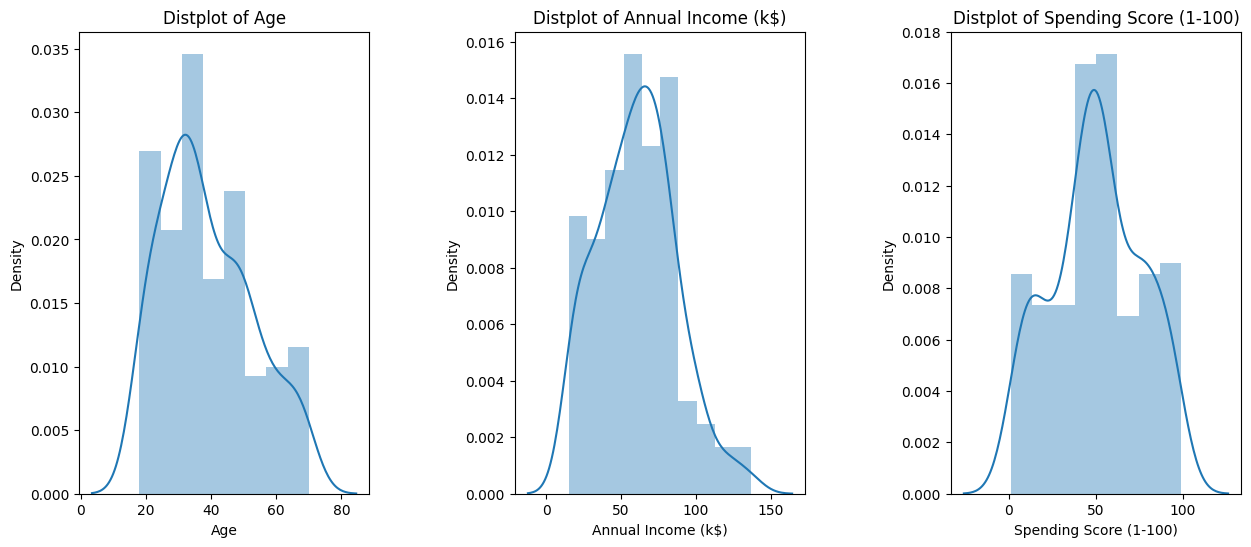

In [11]:
# Visualizing
# histogram
plt.figure(1,figsize=(15,6))
i = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    i +=1
    plt.subplot(1,3,i)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(data[x])
    plt.title('Distplot of {}'.format(x))
plt.show()

<Axes: xlabel='count', ylabel='Genre'>

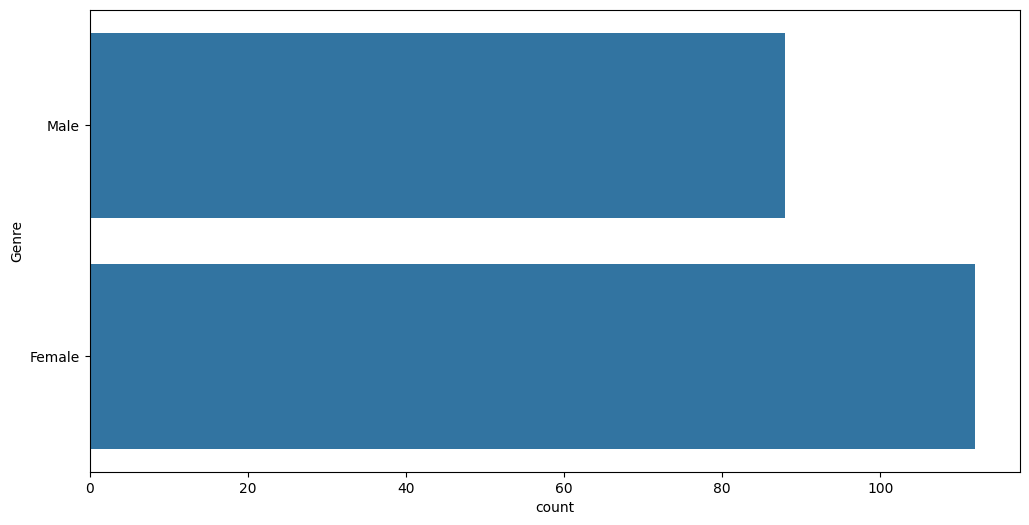

In [12]:
# countplot
plt.figure(figsize=(12,6))
sns.countplot(data['Genre'])

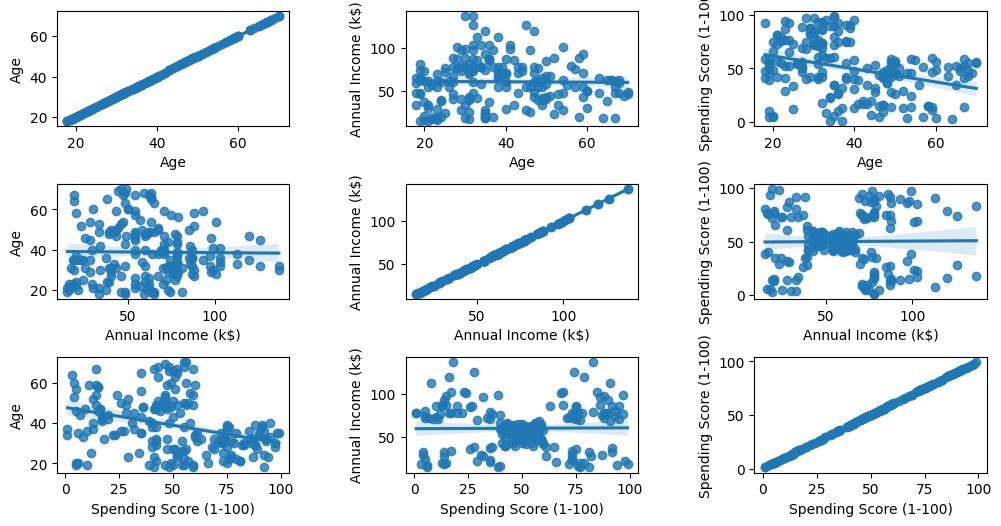

In [13]:
# regression ,sctatter
# ploting the relation between Age , Annual income , spending core
n = 0
plt.figure(figsize=(12,6))
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5 , wspace=0.5)
        sns.regplot(x=x,y=y,data = data)
plt.show()

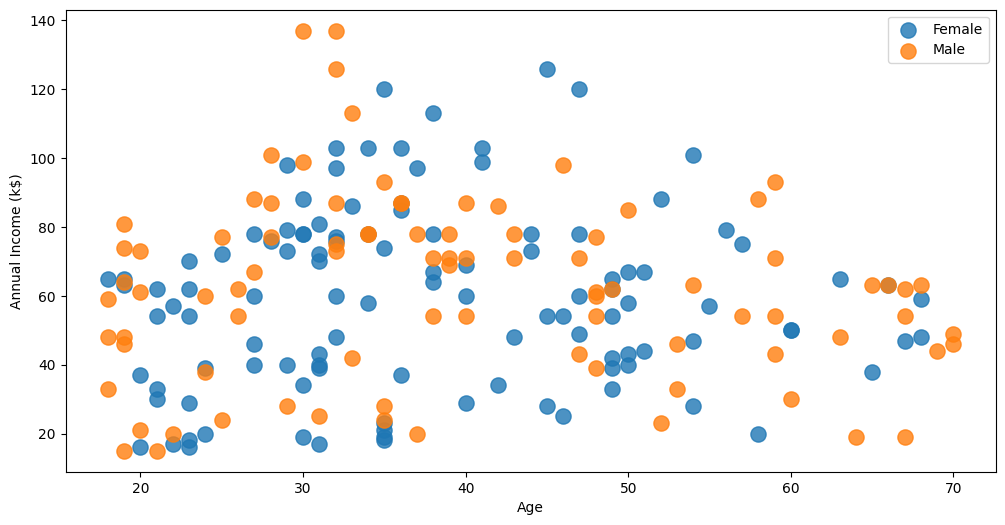

In [14]:
# Scatter beween Age and annual income (Genre)
plt.figure(figsize=(12,6))
for gender in ['Female','Male']:
    plt.scatter(x='Age',y = 'Annual Income (k$)',data = data[data['Genre']==gender],s = 120,alpha = 0.8,label = gender)
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

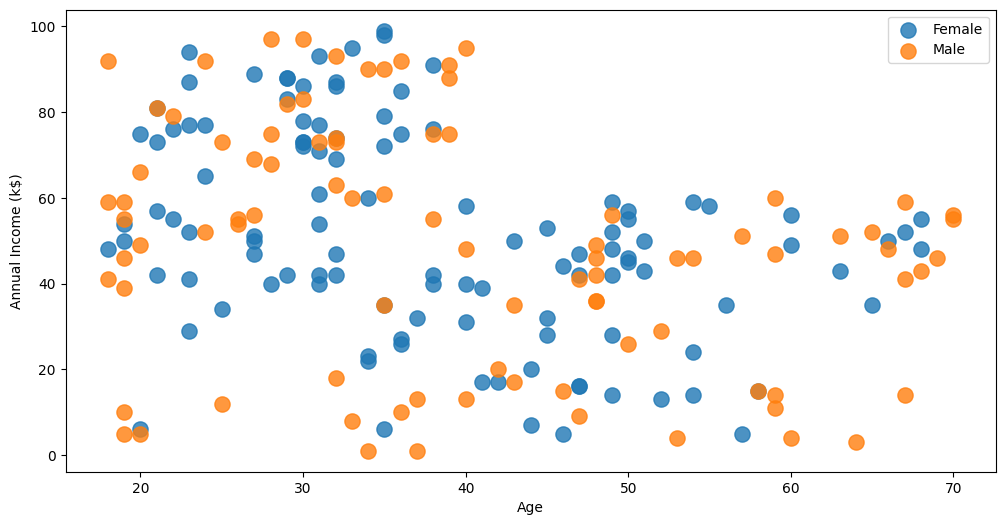

In [15]:
# Scatter beween Age and annual income (Genre)
plt.figure(figsize=(12,6))
for gender in ['Female','Male']:
    plt.scatter(x='Age',y = 'Spending Score (1-100)',data = data[data['Genre']==gender],s = 120,alpha = 0.8,label = gender)
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

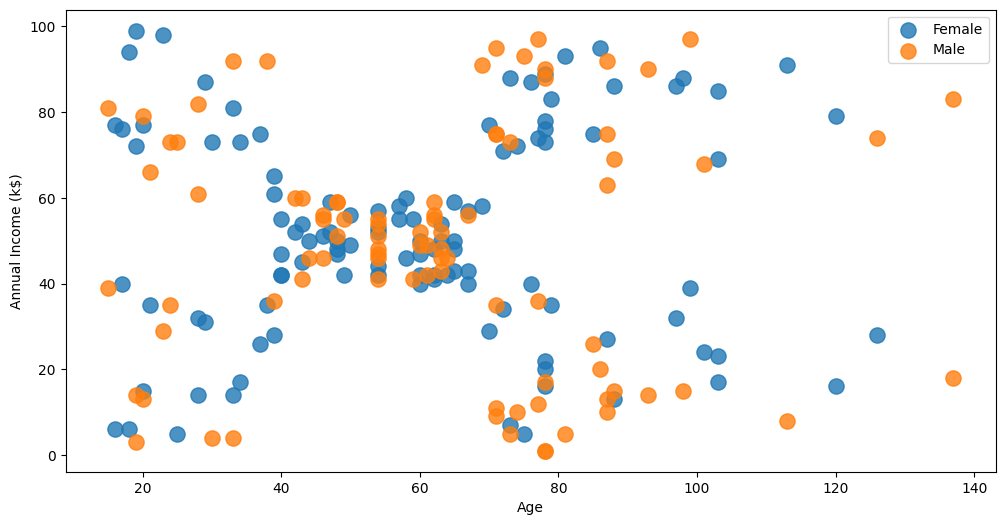

In [16]:
plt.figure(figsize=(12,6))
for gender in ['Female','Male']:
    plt.scatter(x='Annual Income (k$)',y = 'Spending Score (1-100)',data = data[data['Genre']==gender],s = 120,alpha = 0.8,label = gender)
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

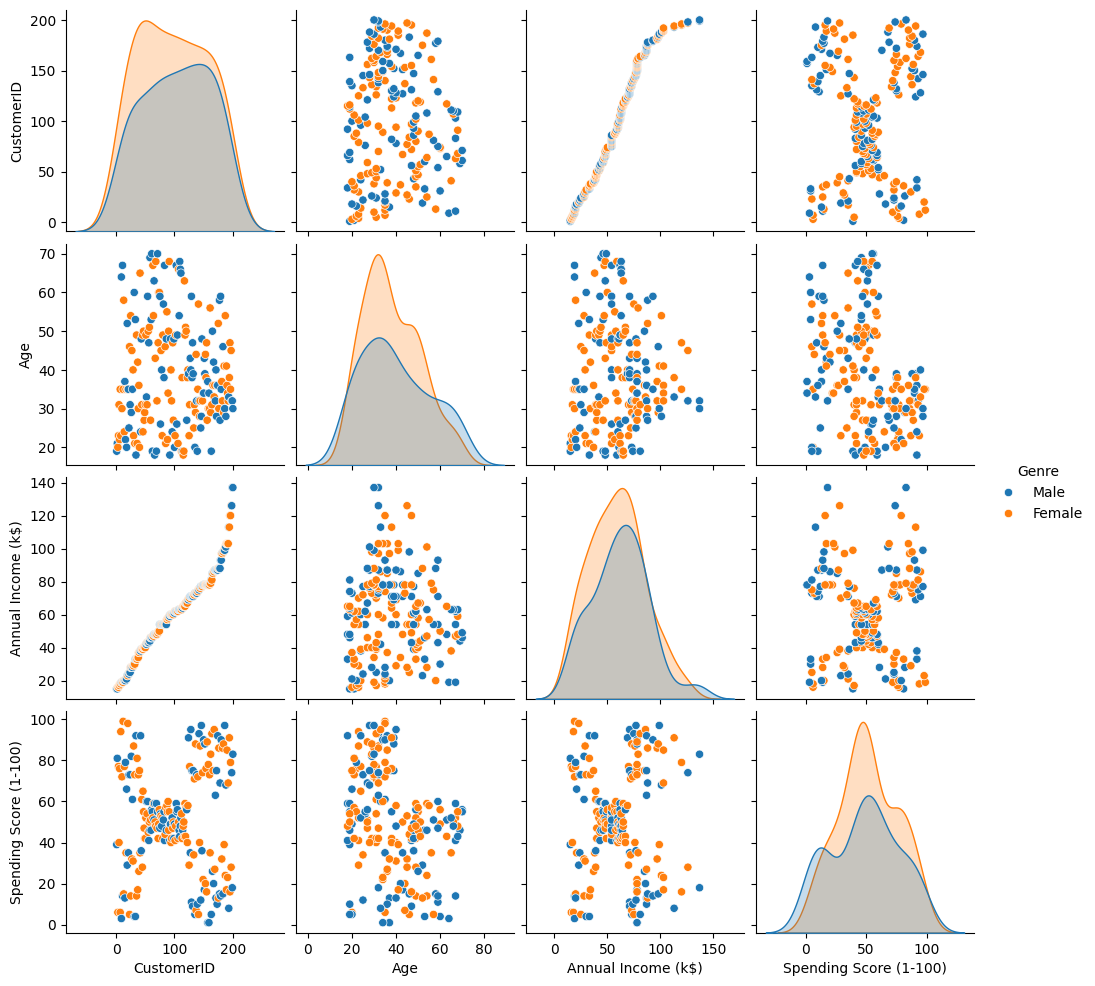

In [17]:
# pair plot 
sns.pairplot(data = data,hue = 'Genre')

In [18]:
dataHeatmap = data.drop('Genre',axis=1)
dataHeatmap = dataHeatmap.drop('CustomerID',axis=1)
dataHeatmap.sample(5)

,Age,Annual Income (k$),Spending Score (1-100)
94,32,60,42
0,19,15,39
174,52,88,13
175,30,88,86
55,47,43,41


In [19]:
corrmat = dataHeatmap.corr()
corrmat

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

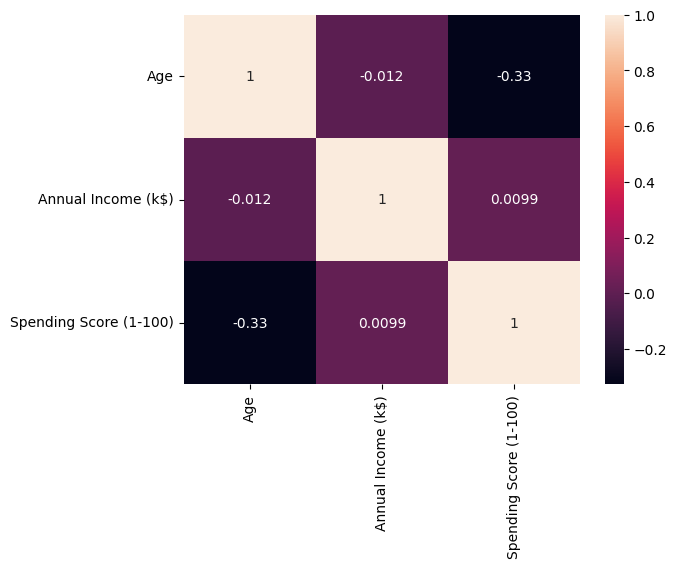

In [20]:
sns.heatmap(data = corrmat,annot=True)

In [21]:
# Age and Annual Income
x1 = data[['Age','Annual Income (k$)']].values
x1.shape
inertia = []
for n in range (1,8):
    # Khi sử dụng init='k-means++', thuật toán sẽ lựa chọn các trọng tâm ban đầu sao cho chúng phân bố đều và cách xa nhau. 
    # Phương pháp này giúp tăng cường khả năng hội tụ của thuật toán và giảm thời gian cần thiết để đạt được kết quả tốt hơn
    #  so với việc chọn trọng tâm ngẫu nhiên.
    algorithm = KMeans(n_clusters=n,init='k-means++',random_state=111)
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)



d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._

In [22]:
# "Inertia" trong ngữ cảnh của thuật toán gom cụm (clustering) như K-means là một khái niệm đo lường tổng số lượng bình phương khoảng cách
#  giữa mỗi điểm dữ liệu và trung tâm của cụm gần nhất mà nó được gán vào. Trong thuật ngữ toán học, inertia cũng được gọi là "within-cluster sum of squares".
inertia

[176108.77999999997,
 87121.56591478697,
 59486.96143928035,
 39502.77850064537,
 31672.265801612375,
 25416.40245864744,
 22264.37152607153]

Text(0, 0.5, 'Inertia')

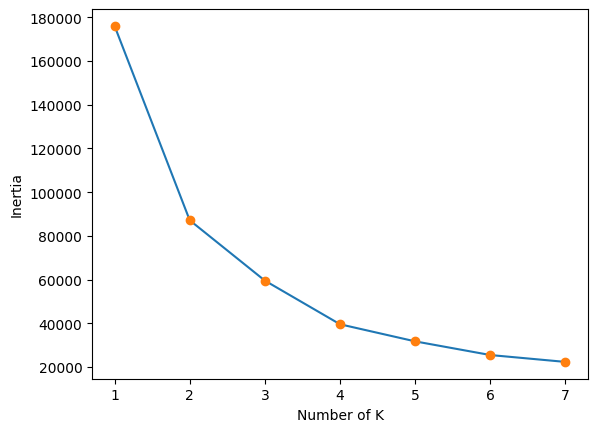

In [23]:
plt.plot(np.arange(1,8),inertia)
plt.plot(np.arange(1,8),inertia,'o')
plt.xlabel('Number of K')
plt.ylabel('Inertia')

In [24]:
# k = 4
algorithm = KMeans(n_clusters=4,random_state=111)
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
labels1.shape

(200,)

In [26]:
labels1

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [27]:
centroids1

array([[ 39.        , 106.5       ],
       [ 55.66071429,  51.01785714],
       [ 31.95890411,  72.95890411],
       [ 29.44680851,  29.21276596]])

Text(0, 0.5, 'Annual Income (k$)')

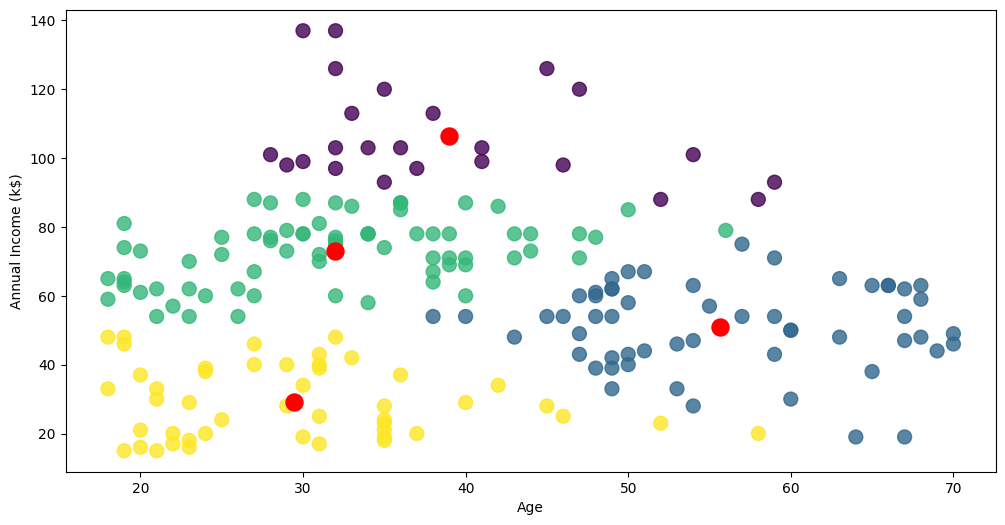

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(x = 'Age',y = 'Annual Income (k$)',data = data , c = labels1,s = 100,alpha=0.8)
plt.scatter(x = centroids1[:,0],y = centroids1[:,1],c = 'red',s=150)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')


In [29]:
# spending score and Annual Income
x1 = data[['Spending Score (1-100)','Annual Income (k$)']].values
x1.shape
inertia = []
for n in range (1,8):
    # Khi sử dụng init='k-means++', thuật toán sẽ lựa chọn các trọng tâm ban đầu sao cho chúng phân bố đều và cách xa nhau. 
    # Phương pháp này giúp tăng cường khả năng hội tụ của thuật toán và giảm thời gian cần thiết để đạt được kết quả tốt hơn
    #  so với việc chọn trọng tâm ngẫu nhiên.
    algorithm = KMeans(n_clusters=n,init='k-means++',random_state=111)
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._

Text(0, 0.5, 'Inertia')

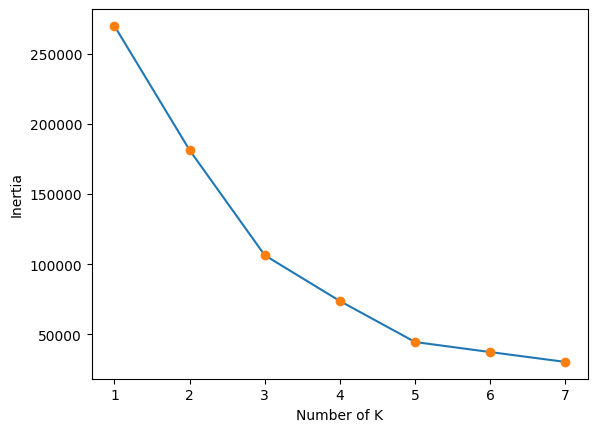

In [30]:
plt.plot(np.arange(1,8),inertia)
plt.plot(np.arange(1,8),inertia,'o')
plt.xlabel('Number of K')
plt.ylabel('Inertia')

In [31]:
# k = 3
algorithm = KMeans(n_clusters=3,random_state=111)
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

d:\pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Annual Income (k$)')

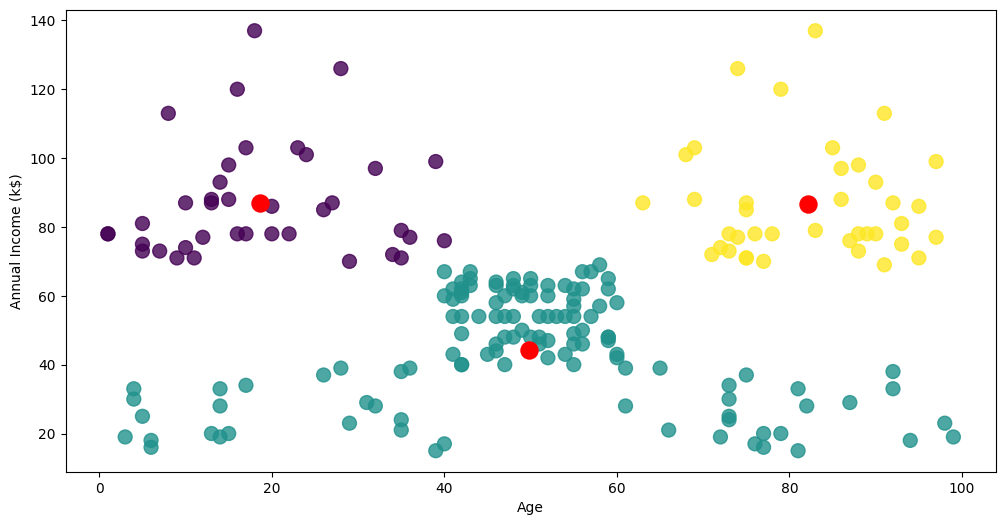

In [32]:
plt.figure(figsize=(12,6))
plt.scatter(x = 'Spending Score (1-100)',y = 'Annual Income (k$)',data = data , c = labels1,s = 100,alpha=0.8)
plt.scatter(x = centroids1[:,0],y = centroids1[:,1],c = 'red',s=150)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')